In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

#drive.mount('/content/drive', force_remount=True)

Mounted at /content/gdrive


## Preprocessing New Approach

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


>**Determine the number of unique values in each column BEFORE dropping any columns**




In [3]:
# Determine the number of unique values in each column
application_df_columns = application_df.nunique()
application_df_columns

EIN                       34299
NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

>**EIN is absolutely unique and should be dropped.**

In [4]:
# Drop the non-beneficial ID columns, 'EIN'.
application_df = application_df.drop(columns=['EIN'])
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


>**Let's look at 'NAME' column more closely.**


In [5]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Look at NAME value counts for binning
NAME_counting = application_df['NAME'].value_counts()
print(NAME_counting.head(50))
print(NAME_counting.tail(30))

NAME
PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                        408
PTA TEXAS CONGRESS                                                     368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                          331
ALPHA PHI SIGMA                                                        313
TOASTMASTERS INTERNATIONAL                                             293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                      287
LITTLE LEAGUE BASEBALL INC                                             277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                               266
MOMS CLUB                                                              210
INTERNATIONAL ASSOCI

In [6]:
# Let's look at NAME value counts >10
NAME_above_ten = NAME_counting[NAME_counting >10]
print(NAME_above_ten)

NAME
PARENT BOOSTER USA INC                                                    1260
TOPS CLUB INC                                                              765
UNITED STATES BOWLING CONGRESS INC                                         700
WASHINGTON STATE UNIVERSITY                                                492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                            408
PTA TEXAS CONGRESS                                                         368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                              331
ALPHA PHI SIGMA                                                            313
TOASTMASTERS INTERNATIONAL                                                 293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                          287
LITTLE LEAGUE BASEBALL INC                                                 277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                   266
MOMS CLUB                                      

In [7]:
# Choose a cutoff value and create a list of NAMES types to be replaced
# use the variable name `names_to_replace`

## Choose a cutoff value
cutoff_value = 10

names_to_replace = NAME_counting[NAME_counting < cutoff_value].index.tolist()

# Replace in dataframe
for name in names_to_replace:
    application_df['NAME'] = application_df['NAME'].replace(name,"Other")

# Check to make sure binning was successful
application_df['NAME'] .value_counts()

NAME
Other                                                                     21022
PARENT BOOSTER USA INC                                                     1260
TOPS CLUB INC                                                               765
UNITED STATES BOWLING CONGRESS INC                                          700
WASHINGTON STATE UNIVERSITY                                                 492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                             408
PTA TEXAS CONGRESS                                                          368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                               331
ALPHA PHI SIGMA                                                             313
TOASTMASTERS INTERNATIONAL                                                  293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                           287
LITTLE LEAGUE BASEBALL INC                                                  277
INTERNATIONAL ASSOCIATION OF LIONS 

>**After keeping NAME column, continue on with Application_Type binning and Classification binning**

In [8]:
# Look at APPLICATION_TYPE value counts for binning
app_counts = application_df['APPLICATION_TYPE'].value_counts()
app_counts

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [9]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`

## Choose a cutoff value
cutoff_value = 500

application_types_to_replace = app_counts[app_counts < cutoff_value].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()


APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
C2190        1
C4200        1
C2600        1
C5200        1
C1370        1
C1248        1
C6100        1
C1820        1
C1900        1
C1236        1
C3700        1
C2570        1
C1580        1
C1245        1
C2500        1
C1570        1
C1283        1
C2380        1
C1732        1
C1728        1
C2170     

In [11]:
# You may find it helpful to look at CLASSIFICATION value counts >1

class_above_one = classification_counts[classification_counts > 1]
class_above_one

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [12]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`

## Choose a cutoff value
cutoff_value = 1200

classifications_to_replace = classification_counts[classification_counts < cutoff_value].index.tolist()

for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [13]:
# Convert categorical data to numeric with `pd.get_dummies`
## Note: .astype(int) was added to switch boolean variables (True/False) to integers

application_df_dummies = pd.get_dummies(application_df).astype(int)
application_df_dummies.head()


,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALTRUSA INTERNATIONAL FOUNDATION INC,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ART THERAPY ASSOCIATION INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN INC,NAME_AMERICAN CHRISTIAN FICTION WRITERS INC,NAME_AMERICAN COLLEGE OF HEALTHCARE EXECUTIVES,NAME_AMERICAN COLLEGE OF NURSE-MIDWIVES,NAME_AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES,NAME_AMERICAN FEDERATION OF LABOR & CONGRESS OF INDUSTRIAL ORGS,NAME_AMERICAN FEDERATION OF LABOR AND CONGRESS OF INDUSTRIAL ORGS,NAME_AMERICAN FEDERATION OF STATE COUNTY & MUNICIPAL EMPLOYEES,NAME_AMERICAN IRIS SOCIETY,NAME_AMERICAN LEGION,NAME_AMERICAN LEGION AUXILIARY,NAME_AMERICAN POSTAL WORKERS UNION,NAME_AMERICAN STUDENT DENTAL ASSOCIATION,NAME_AMERICAN WATER WORKS ASSOCIATION,NAME_AMERICAN YOUTH FOOTBALL INC,NAME_AMERICANS UNITED FOR SEPARATION OF CHURCH AND STATE,NAME_AMIGOS DE LAS AMERICAS,NAME_AMVETS,NAME_ANCIENT AND FREE ACCEPTED MASONS OF MISSOURI,NAME_ANCIENT FREE & ACCEPTED MASONS OF KANSAS,NAME_ARIZONA FEDERATION OF GARDEN CLUBS,NAME_ASIAN PACIFIC AMERICAN INTERNAL REVENUE EMPLOYEES,NAME_ASSOCIATION FOR PROFESSIONALS IN INFECTION CTRL & EPIDEMIOLOGY INC,NAME_ASSOCIATION FOR VASCULAR ACCESS,NAME_ASSOCIATION OF CIVILIAN TECHNICIANS INC,NAME_ASSOCIATION OF CLINICAL RESEARCH PROFESSIONALS,NAME_ASSOCIATION OF OPERATING ROOM NURSES INC,NAME_ASSOCIATION OF PROFESSIONAL GENEALOGISTS,NAME_ASSOCIATION OF TRADITIONAL HOOKING ARTISTS,NAME_BABYWEARING INTERNATIONAL INC,NAME_BEAVERHEAD COUNTY 4-H FOUNDATION,NAME_BETTER WORLD FUND,NAME_BOY SCOUTS OF AMERICA,NAME_BOYS TEAM CHARITY INC,NAME_CALIFORNIA ASSOCIATION FOR THE EDUCATION OF YOUNG CHILDREN,NAME_CALIFORNIA FEDERATION OF WOMENS CLUBS,NAME_CALIFORNIA GARDEN CLUBS INC,NAME_CALIFORNIA HIGHWAY PATROL EXPLORER PROGRAM,NAME_CALIFORNIA STATE CHAPER WOMENS COUNCIL OF REALTORS,NAME_CALIFORNIA STATE UNIVERSITY EMPLOYEES UNION,NAME_CALIFORNIA TEACHERS ASSOCIATION,NAME_CALIFORNIA WOMENS CHORUS,NAME_CASCADE 4-H FOUNDATION,NAME_CENTERS FOR SPIRITUAL LIVING,NAME_CHEVRON RETIREES ASSOCIATION,NAME_CISD EDUCATIONAL SUPPORT GROUPS INC,NAME_CIVITAN INTERNATIONAL,NAME_CLEAR CREEK ISD GROUPS,NAME_CLEARCREEK I S D SUPPORT GROUPS,NAME_COLLEGE AND UNIVERSITY PROFESSIONAL ASSOCIATION FOR HUMAN RESOURCES,NAME_CONSTRUCTION OWNERS ASSOCIATION OF AMERICA INC,NAME_DAUGHTERS OF ESTHER FELLOWSHIP INTERNATIONAL MINISTRIES INC,NAME_DAUGHTERS OF UNION VETERANS OF THE CIVIL WAR 1861-1865,NAME_DEMOLAY INTERNATIONAL,NAME_DEPARTMENT OF ALABAMA AUXILIARY TO THE VFW OF THE U S,NAME_DEPARTMENT OF ALABAMA VETERANS OF FOREIGN WARS OF THE UNITED STATES,NAME_DEPARTMENT OF KANSAS LADIES AUXILIARY TO THE VFW OF THE US INC,NAME_DEPARTMENT OF MONTANA LADIES AUXILIARY TO THE VFW OF THE U S,NAME_DEPARTMENT OF NEVADA VETERANS OF FOREIGN WARS OF THE U S INC,NAME_DEPARTMENT OF NEW MEXICO VETERANS OF FOREIGN WARS OF THE US AUXILIAR,NAME_DEPARTMENT OF OREGON LADIES AUXILIARY TO THE VFW OF THE U S,NAME_DEPARTMENT OF UTAH LADIES AUXILIARY TO THE VETERANS OF FOREIGN WARS OF,NAME_DEPARTMENT OF WYOMING VFW AUXILIARY,NAME_DEPT OF GEORGIA LADIES AUXILIARY TO THE VFW OF THE UNITED STATES,NAME_DISABLED AMERICAN VETERANS,NAME_DISABLED AMERICAN VETERANS AUXILIARY INC,NAME_DISTRICT 21 AMERICAN CONTRACT BRIDGE LEAGUE,NAME_DOBERMAN PINSCHER CLUB OF AMERICA,NAME_EMERGENCY NURSES ASSOCIATION,NAME_EXECUTIVE WOMENS GOLF ASSOCIATION INC,NAME_FARMERS EDUCATIONAL AND COOPERATIVE UNION OF AMERICA,NAME_FELLOWSHIP OF CHRISTIAN COWBOYS INC,NAME_FINANCIAL PLANNING ASSOCIATION,NAME_FLORIDA GOVERNMENT FINANCE OFFICERS ASSOCIATION INC,NAME_FLORIDA STATE UNIVERSITY ALUMNI ASSOCIATION,NAME_FRATERNAL ORDER OF EAGLES,NAME_FRATERNAL ORDER OF POLICE,NAME_FREE & ACCEPTED MASONS OF CALIFORNIA,

In [14]:
# Split our preprocessed data into our features and target arrays
y = application_df_dummies["IS_SUCCESSFUL"].values
X = application_df_dummies.drop(columns="IS_SUCCESSFUL").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

X_train.shape

(25724, 266)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Optimize the Model by keeping 'NAME' column intact

## **Attempt #4 (FINAL)**


In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=len(X_train[0])))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                21360     
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 23821 (93.05 KB)
Trainable params: 23821 (93.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 7s 7ms/step - loss: 0.4735 - accuracy: 0.7721
Epoch 2/100
804/804 [==============================] - 5s 6ms/step - loss: 0.4448 - accuracy: 0.7848
Epoch 3/100
804/804 [==============================] - 7s 8ms/step - loss: 0.4414 - accuracy: 0.7851
Epoch 4/100
804/804 [==============================] - 6s 7ms/step - loss: 0.4390 - accuracy: 0.7861
Epoch 5/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4372 - accuracy: 0.7872
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4361 - accuracy: 0.7878
Epoch 7/100
804/804 [==============================] - 3s 4ms/step - loss: 0.4353 - accuracy: 0.7882
Epoch 8/100
804/804 [==============================] - 3s 4ms/step - loss: 0.4339 - accuracy: 0.7884
Epoch 9/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4336 - accuracy: 0.7897
Epoch 10/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4326 - accura

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.4690 - accuracy: 0.7817 - 900ms/epoch - 3ms/step
Loss: 0.46896594762802124, Accuracy: 0.7816909551620483


<Axes: >

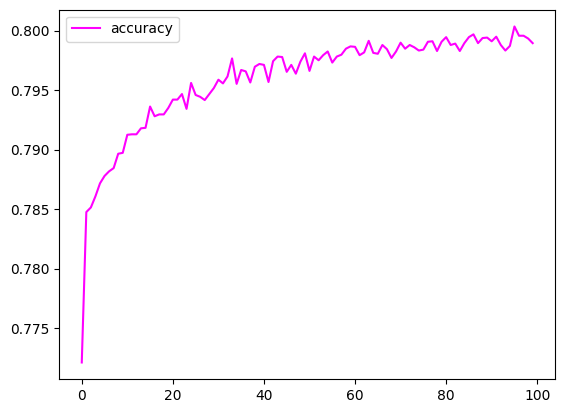

In [20]:
import matplotlib.pyplot as plt

# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Plot the accuracy
history_df.plot(y="accuracy", color='magenta')

`FINAL RESULTS 4: `

*   ~ 78% Accuracy achieved!
*   Not dropping 'NAME' column from the dataset and creating bins in this column was the right approach for optimizing our model.



In [21]:
# Export our model to HDF5 file
nn.save("/content/gdrive/My Drive/AlphabetSoupCharity_Optimization_4_Final.h5")
print("HDF5 file successfully.")

HDF5 file successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
